In [1]:
import numpy as np

In [2]:
data=np.load('data_grey.npy')
target=np.load('target_grey.npy')

In [3]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout,Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import Adam


Using TensorFlow backend.


In [4]:
model = Sequential()


model.add(Convolution2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1,1)))
model.add(MaxPooling2D((2,2),padding='SAME'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2),padding='SAME'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(50, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), padding='SAME'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(50, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), padding='SAME'))



model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2, activation='softmax'))

In [5]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
from keras.callbacks import ModelCheckpoint

In [8]:
checkpoint = ModelCheckpoint('model_grey-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.3)

Train on 866 samples, validate on 372 samples
Epoch 1/20
866/866 [==============================] - 337s 390ms/step - loss: 0.6744 - accuracy: 0.5808 - val_loss: 0.5573 - val_accuracy: 0.7473
Epoch 2/20
866/866 [==============================] - 301s 348ms/step - loss: 0.4838 - accuracy: 0.7714 - val_loss: 0.5419 - val_accuracy: 0.7231
Epoch 3/20
866/866 [==============================] - 426s 492ms/step - loss: 0.3436 - accuracy: 0.8684 - val_loss: 0.3328 - val_accuracy: 0.8441
Epoch 4/20
866/866 [==============================] - 293s 338ms/step - loss: 0.2862 - accuracy: 0.8903 - val_loss: 0.1467 - val_accuracy: 0.9543
Epoch 5/20
866/866 [==============================] - 954s 1s/step - loss: 0.1370 - accuracy: 0.9492 - val_loss: 0.1656 - val_accuracy: 0.9328
Epoch 6/20
866/866 [==============================] - 301s 347ms/step - loss: 0.1095 - accuracy: 0.9584 - val_loss: 0.2543 - val_accuracy: 0.8710
Epoch 7/20
866/866 [==============================] - 296s 342ms/step - loss: 0.0

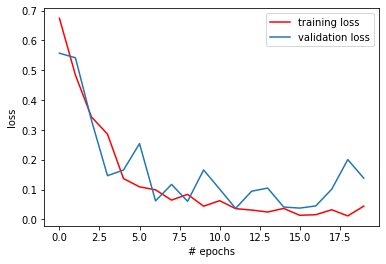

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

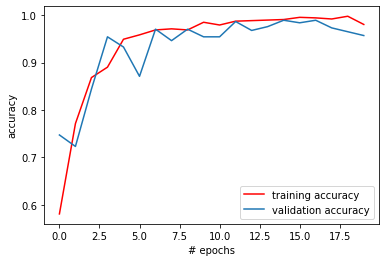

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 13s 95ms/step
[0.15605698185770409, 0.9710144996643066]
